<a href="https://colab.research.google.com/github/diaboloshogunate/GoogleColabML/blob/main/fashionMNIST-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Imports
import sys
import torch
from torch import nn
import torchvision
from torchvision.transforms import ToTensor
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline 

In [9]:
# Enable GPU if avialable
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [10]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self, stack):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = stack

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [11]:
# Define train/test
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [12]:
# datasets
trainset = torchvision.datasets.FashionMNIST('./data', download=True, train=True, transform=ToTensor())
testset = torchvision.datasets.FashionMNIST('./data', download=True, train=False, transform=ToTensor())

In [13]:
# parameters
epochs = 2
batch_size = 10
learning_rate = 0.1
activation = nn.ReLU()
loss_fn = nn.CrossEntropyLoss()
layers = [nn.Linear(28*28, 1024), activation, nn.Linear(1024, 1024), activation, nn.Linear(1024, 10)]

# data loaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

In [14]:
# model
model = NeuralNetwork(nn.Sequential(*layers)).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)

print(f"Batch: {batch_size}, Learning Rate: {learning_rate}, Activation: {activation}\n")

# epics
for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train(trainloader, model, loss_fn, optimizer)
    test(testloader, model, loss_fn)

Batch: 10, Learning Rate: 0.1, Activation: ReLU()

Epoch 1
-------------------------------
Test Error: 
 Accuracy: 84.4%, Avg loss: 0.417993 

Epoch 2
-------------------------------
Test Error: 
 Accuracy: 85.5%, Avg loss: 0.395471 



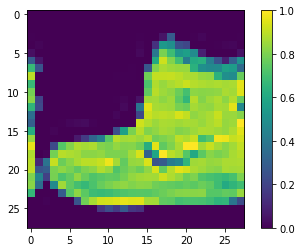

In [24]:
# show roll result
plt.figure()
plt.imshow(np.squeeze(torch.roll(trainset[0][0], shifts=(0,0,2), dims=(0,1,2)).numpy()))
plt.colorbar()
plt.show()

In [32]:
def horizontal_shift(pil_image):
    tensor = ToTensor()
    return torch.roll(tensor(pil_image), shifts=(0,0,2), dims=(0,1,2))

def vertical_shift(pil_image):
    tensor = ToTensor()
    return torch.roll(tensor(pil_image), shifts=(0,2,0), dims=(0,1,2))

In [31]:
# test with horizontal shift
testset = torchvision.datasets.FashionMNIST('./data', download=True, train=False, transform=horizontal_shift)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    test(testloader, model, loss_fn)

Epoch 1
-------------------------------
Test Error: 
 Accuracy: 58.1%, Avg loss: 1.212546 

Epoch 2
-------------------------------
Test Error: 
 Accuracy: 58.1%, Avg loss: 1.212546 



In [33]:
# test with vertical shift
testset = torchvision.datasets.FashionMNIST('./data', download=True, train=False, transform=vertical_shift)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    test(testloader, model, loss_fn)

Epoch 1
-------------------------------
Test Error: 
 Accuracy: 74.1%, Avg loss: 0.820813 

Epoch 2
-------------------------------
Test Error: 
 Accuracy: 74.1%, Avg loss: 0.820813 

